In [1]:
import pandas as pd

# Load the dataset from the data folder
df = pd.read_csv('../data/loan_approval_dataset.csv')

# Display the first 5 rows to ensure it loaded
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [2]:
# Check data types and look for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [3]:
# 1. Clean the column names by stripping hidden spaces
df.columns = df.columns.str.strip()

# 2. Drop the 'loan_id' column (Feature Selection)
df = df.drop(columns=['loan_id'])

# 3. Strip hidden spaces from the actual text data inside the columns
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

# 4. Encode text categories into numbers (0 and 1)
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

# 5. Verify the data is now completely numeric and clean!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate Features (X) from Target (y)
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# 2. First Split: Separate out the final TEST set (15% of total)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 3. Second Split: Split the remaining data into TRAINING (70%) and VALIDATION (15%)
# 0.176 is used to get 15% of the original 100% from the remaining 85%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)

# 4. Normalize the features
scaler = StandardScaler()

# Fit ONLY on training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets using the training scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print the results to verify
print(f"Training set:   {X_train_scaled.shape[0]} rows (70%)")
print(f"Validation set: {X_val_scaled.shape[0]} rows (15%)")
print(f"Testing set:    {X_test_scaled.shape[0]} rows (15%)")

Training set:   2989 rows (70%)
Validation set: 639 rows (15%)
Testing set:    641 rows (15%)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the AI Model (Random Forest is highly accurate for this type of data)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the Model (The AI learns from your scaled training data)
rf_model.fit(X_train_scaled, y_train)

# 3. Test the Model (We ask it to predict the 854 hidden test records)
y_pred = rf_model.predict(X_test_scaled)

# 4. Evaluate the Performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9765990639625585

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       233
           1       0.98      0.99      0.98       408

    accuracy                           0.98       641
   macro avg       0.98      0.97      0.97       641
weighted avg       0.98      0.98      0.98       641


--- Confusion Matrix ---
[[224   9]
 [  6 402]]


In [6]:
import joblib

# Save the updated model and the scaler
joblib.dump(rf_model, '../models/loan_model.joblib')
joblib.dump(scaler, '../models/scaler.joblib')

print("Final Model and Scaler saved and ready for the Interface!")

Final Model and Scaler saved and ready for the Interface!


In [9]:
from sklearn.metrics import classification_report

try:
    # We pass the raw test data through your StandardScaler first!
    X_test_scaled = scaler.transform(X_test)
    
    # Now we predict using the properly scaled data
    y_pred = rf_model.predict(X_test_scaled)
    
    print("SCALED SUCCESSFULLY! Here are your REAL numbers:\n")
    print(classification_report(y_test, y_pred))
    
except Exception as e:
    print(f"Error: {e}")

SCALED SUCCESSFULLY! Here are your REAL numbers:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       233
           1       0.98      0.99      0.98       408

    accuracy                           0.98       641
   macro avg       0.98      0.97      0.97       641
weighted avg       0.98      0.98      0.98       641



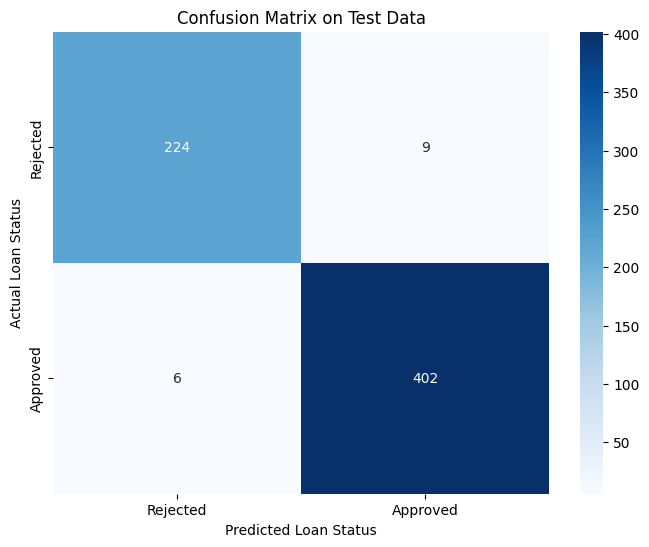

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# This uses the y_pred we just fixed!
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rejected', 'Approved'], 
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix on Test Data')
plt.ylabel('Actual Loan Status')
plt.xlabel('Predicted Loan Status')
plt.show()

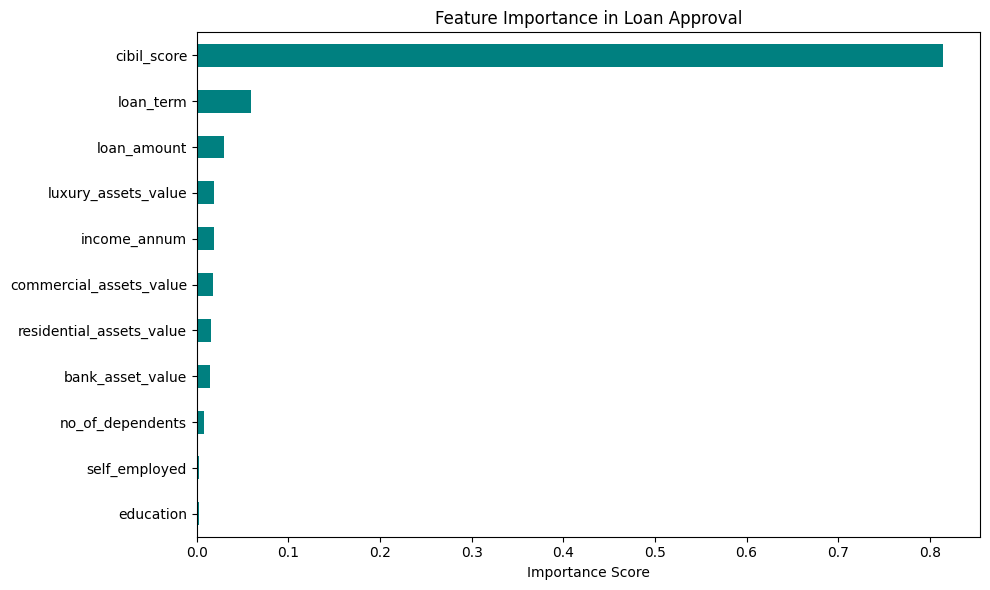

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns # Automatically grabs your 11 column names

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
forest_importances.plot.barh(color='teal')
plt.title('Feature Importance in Loan Approval')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

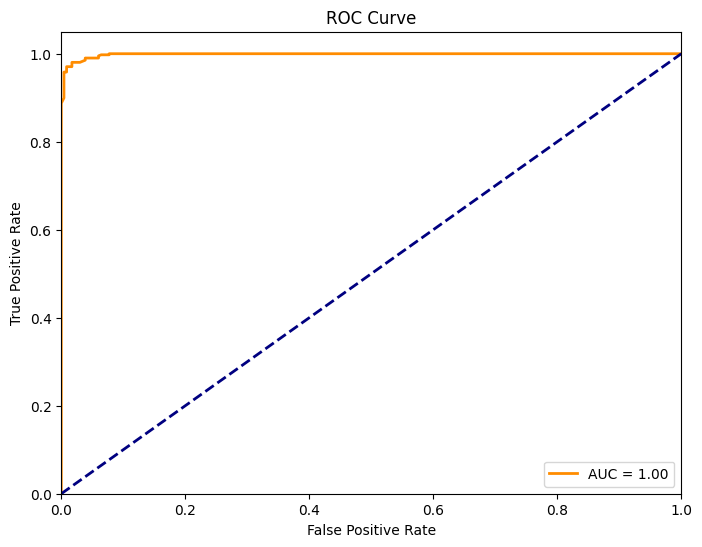

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Notice we are using the X_test_scaled here!
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

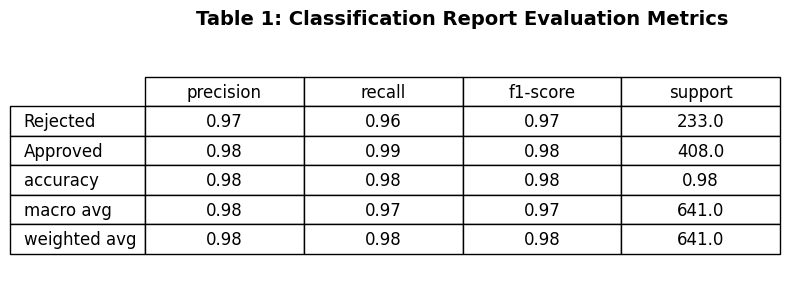

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 1. Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'], output_dict=True)

# 2. Convert it into a Pandas DataFrame and round the numbers
df_report = pd.DataFrame(report_dict).transpose().round(2)

# 3. Set up the visual figure
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')  # Hide the graph axes
ax.axis('tight')

# 4. Draw the table
table = ax.table(cellText=df_report.values,
                 colLabels=df_report.columns,
                 rowLabels=df_report.index,
                 loc='center',
                 cellLoc='center')

# 5. Format it to look like a professional academic table
table.scale(1, 1.8)
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.title('Table 1: Classification Report Evaluation Metrics', weight='bold', size=14, pad=20)

# 6. Show the visual table
plt.tight_layout()
plt.show()